# Check If PyTorch Is Using The GPU
Feb 2020<br>
https://chrisalbon.com/deep_learning/pytorch/basics/check_if_pytorch_is_using_gpu/

In [1]:
import torch

In [2]:
# How many GPUs are there?
print(torch.cuda.device_count())

1


In [3]:
# Which GPU Is The Current GPU?
print(torch.cuda.current_device())

0


In [4]:
# Is PyTorch using a GPU?
print(torch.cuda.is_available())

True


In [5]:
# Get the name of the current GPU
print(torch.cuda.get_device_name(device=None))
#print(torch.cuda.get_device_name(torch.cuda.current_device()))

GeForce GTX 1050 Ti


In [6]:
# Gets the cuda capability of a device.
# device = device for which to return the device capability.
#     This function is a no-op if this argument is a negative integer.
#     It uses the current device, given by current_device(), if device is None (default).
# Returns the the major and minor cuda capability of the device
torch.cuda.get_device_capability(device=None)

(6, 1)

In [7]:
# Get device properties
torch.cuda.get_device_properties(device=None)

_CudaDeviceProperties(name='GeForce GTX 1050 Ti', major=6, minor=1, total_memory=4040MB, multi_processor_count=6)

# YouTube - series by Sentdex

Introduction - Deep Learning and Neural Networks with Python and Pytorch p.1<br>
https://www.youtube.com/watch?v=BzcBsTou0C0

Data - Deep Learning and Neural Networks with Python and Pytorch p.2<br>
https://www.youtube.com/watch?v=i2yPxY2rOzs

Building our Neural Network - Deep Learning and Neural Networks with Python and Pytorch p.3<br>
https://www.youtube.com/watch?v=ixathu7U-LQ

Training Model - Deep Learning and Neural Networks with Python and Pytorch p.4<br>
https://www.youtube.com/watch?v=9j-_dOze4IM

Convnet Intro - Deep Learning and Neural Networks with Python and Pytorch p.5<br>
https://www.youtube.com/watch?v=9aYuQmMJvjA

Training Convnet - Deep Learning and Neural Networks with Python and Pytorch p.6<br>
https://www.youtube.com/watch?v=1gQR24B3ISE

On the GPU - Deep Learning and Neural Networks with Python and Pytorch p.7<br>
https://www.youtube.com/watch?v=6gk7giKER6s

Model Analysis - Deep Learning and Neural Networks with Python and Pytorch p.8<br>
https://www.youtube.com/watch?v=UuteCccDXCE

# VIRTUAL ENVIRONMENT SETUP AND PACKAGES INSTALLED

python3 -m venv pv5pytorchGpu1<br>
source ~/.venvPython/pv5pytorchGpu1/bin/activate

pip3 install jupyter<br>
pip3 install pandas<br>
pip3 install matplotlib<br>
pip3 install opencv-python<br>

### for CPU version
pip3 install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio==0.8.1 -f<br> https://download.pytorch.org/whl/torch_stable.html<br>

### for GPU version
pip3 install torch torchvision torchaudio

### Not used so far
pip3 install torchsummary

# Data - Deep Learning and Neural Networks with Python and Pytorch p.2

# Building our Neural Network - Deep Learning and Neural Networks with Python and Pytorch p.3

# Training Model - Deep Learning and Neural Networks with Python and Pytorch p.4

Train using MNIST data and thus designing the neural network as a classifier with 10 classes.
MNIST data is handwritten digits (0 to 9) as black and white images of size 28x28 pixels.

In [8]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [9]:
train = datasets.MNIST('/home/rohit/PyWDUbuntu/generic/pytorch_tutorials/MNIST', 
                      train=True, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('/home/rohit/PyWDUbuntu/generic/pytorch_tutorials/MNIST', 
                      train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

In [10]:
trainset = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

In [11]:
#Batching pros:
#    data too large to fit in memory,
#    allow stepping more often and not only at end of epoch,
#    allows the algorithm to update the weights with more generalization properties and 
#        somewhat prevents overfitting.
#
# Generally used between 8 and 64, but people do go larger to speed up training.
# Also, people use base8 numbers.

In [12]:
def get_list_shape(_inlist):
    out_shape = list()
    x = _inlist
    for _ in range(10):
        try:
            out_shape.append(len(x))
            x = x[0]
        except:
            break
    return tuple(out_shape)

In [13]:
for data in trainset:
    print(f"type(data) = {type(data)}") # data here is a list
    print(f"\nShape of this list: {get_list_shape(data)}")
    print(f"\ndata =\n{data}")
    break

# len(data) = 2
# len(data[0]) = 16
# len(data[0][0]) = 1
# len(data[0][0][0]) = 28
# len(data[0][0][0][0]) = 28
# len(data[0][0][0][0][0]) : fails with 'TypeError: len() of a 0-d tensor'

type(data) = <class 'list'>

Shape of this list: (2, 32, 1, 28, 28)

data =
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [

In [14]:
x, y = data[0], data[1]
print(x.shape, y.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [15]:
# access first image info only
x, y = data[0][0], data[1][0]
print(x.shape, y.shape)

torch.Size([1, 28, 28]) torch.Size([])


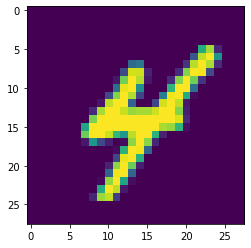

In [16]:
plt.imshow(x.view(28,28))
plt.show()

### check the balancing of the data - i.e. the samples have equal distribution

We find the data is balanced well enought with around 10% per digit as expected.

In [17]:
total = 0
counter_dict = dict()
for i in range(10):
    counter_dict[i] = 0
for data in trainset:
    ys = list(data[1].detach().numpy())
    for y in ys:
        counter_dict[y] += 1
        total += 1
print(counter_dict)
print(total)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
60000


0: total=5923	%=9.87
1: total=6742	%=11.24
2: total=5958	%=9.93
3: total=6131	%=10.22
4: total=5842	%=9.74
5: total=5421	%=9.04
6: total=5918	%=9.86
7: total=6265	%=10.44
8: total=5851	%=9.75
9: total=5949	%=9.92




<AxesSubplot:>

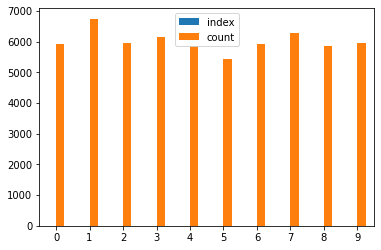

In [18]:
for k, v in counter_dict.items():
    print(f"{k}: total={v}\t%={v/total*100:.2f}")
print(f"")
tempdf = pd.DataFrame.from_dict(counter_dict, columns=['count'], orient='index')
tempdf.reset_index(inplace=True)
tempdf.rename(columns={'index': 'digit'})
#print(tempdf)
print("")
tempdf.plot.bar(rot=0)

For the actual network, we want to input the 28x28 flattened image.
Take output from 10 neurons where each neuron corresponds to the ten digits 0-9.
Ideally for any input image, we want exactly one of these neurons to be a 1 and all the others to be 0.

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Using ReLu for most layers except final one. There using softmax as this is a 
multi-class (10 classes) classifiction problem.

In [20]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        # dim=1, to specify which dimension values do we want the softmaxed probabilities
        #        to sum to 1? dim=0, would point to the batch_Size dimension.
        x = F.log_softmax(x, dim=1)
        
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


### Pass some random 28x28 pixel values to the network and see it produces an output

In [21]:
X = torch.rand((28,28))

In [22]:
# this fails saying:
#     RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x64)
output = net(X)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x64)

In [ ]:
## net defined with returning : x = F.log_softmax(x, dim=1)

print(X.shape)
X = X.view(-1, 28*28)
print(X.shape)
output = net(X)
print(output)

In [ ]:
## now network defined with returning : x = F.softmax(x, dim=1)
## instead of with with returning : x = F.log_softmax(x, dim=1)
## note that applying the log on the output tensor yields the same kind of result as 
## obtained if directly returning with F.log_softmax in above version

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        # dim=1, to specify which dimension values do we want the softmaxed probabilities
        #        to sum to 1? dim=0, would point to the batch_Size dimension.
        #x = F.log_softmax(x, dim=1)
        x = F.softmax(x, dim=1)
        
        return x

net = Net()

X = X.view(-1, 28*28)
output = net(X)
print(output)
print(output.sum())
print(torch.log(output))

In [ ]:
np.log(0.1119)

Redefining the network the way it was originally with F.log_softmax(x, dim=1)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        # dim=1, to specify which dimension values do we want the softmaxed probabilities
        #        to sum to 1? dim=0, would point to the batch_Size dimension.
        x = F.log_softmax(x, dim=1)
        
        return x

net = Net()
print(net)

In [ ]:
## net defined with returning : x = F.log_softmax(x, dim=1)

print(X.shape)
X = X.view(-1, 28*28)
print(X.shape)
output = net(X)
print(output)

In [ ]:
net.parameters()

In [ ]:
## here we are allowing all the parameters to be adjusted.
## but if we were doing transfer learning, we could freeze the initial layers, and
## thus allow only the later layers to be adjustable.

optimizer = optim.Adam(net.parameters(), lr=0.001) # lr=1e-3

In [ ]:
## each of the GT output is a single scalar value i.e. the digit the image represents.

EPOCHS = 1
for epoch in range(EPOCHS):
    for data in trainset:
        ## data is batch of featuresets and labels
        X, y = data
        print(y)
        print(f"")
        print(y[0])
        break

In [ ]:
EPOCHS = 6
for epoch in range(EPOCHS):
    for data in trainset:
        ## data is batch of featuresets and labels
        X, y = data
        
        net.zero_grad() # 0 the grads
        output = net(X.view(-1, 28*28)) # get prediction
        
        ## here the ouput is scalar, so using F.nll_loss
        ## but suppose the output was a 1-hot vector, then MSE loss would be appropriate
        loss = F.nll_loss(output, y) # compute the loss
        loss.backward() # calculate the gradients via backprop
        
        optimizer.step() # update the parameters using the gradients just calculated
    print(loss)

### Validate the data using the testing data

But we do not want the update the weights!!!

Earlier version of pytorch used net.train() and net.eval() to differentiate running in 
training vs evalution mode. But this is no longer used.

In [ ]:
print(output)
print(f"")
print(get_list_shape(output))

In [ ]:
print(output[0])
print()
print(torch.argmax(output[0]))

In [ ]:
abc = torch.rand((10))
print(abc)
print()
abc1 = ( (abc * 100) // 1 ) / 10
print(abc1)
print()
abc2 = torch.round(abc * 10**2) / (10**1)
print(abc2)
print()
print(torch.argmax(abc2))

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f"Accuracy: {correct/total:.6f}")
print(f"Accuracy: {round(correct/total, 3)}")

In [ ]:
for i in range(5):
    print(f"------------")
    print(torch.argmax(net(X[i].view(-1, 28*28))))
    plt.imshow(X[i].view(28,28))
    plt.show()

# Convnet Intro - Deep Learning and Neural Networks with Python and Pytorch p.5

# Training Convnet - Deep Learning and Neural Networks with Python and Pytorch p.6

Train using Microsoft Cats v Dogs dataset and then predict if an image has a cat or a dog.
Note: Every image will have one or the other.<br>
Has 12.5 images of Cats, 12.5k for Dogs.<br>
Here simply resizing the images to a fixed size (50x50).<br>
No augmentation like padding to make same size, or flipping, rotating, etc.

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm

In [ ]:
print(np.eye(2))
CATS_DIR = '/home/rohit/PyWDUbuntu/generic/pytorch_tutorials/MS_Cats_v_Dogs/kagglecatsanddogs_3367a/PetImages/Cat/'
DOGS_DIR = '/home/rohit/PyWDUbuntu/generic/pytorch_tutorials/MS_Cats_v_Dogs/kagglecatsanddogs_3367a/PetImages/Dog/'
abc = CATS_DIR # cats
abc2 = {CATS_DIR: 0, DOGS_DIR: 1}
print(f"")
if abc == CATS_DIR:
    print(np.eye(2)[abc2[abc]])
else:
    print(np.eye(2)[abc2[abc]])
print()
abc = DOGS_DIR # dogs
abc2 = {CATS_DIR: 0, DOGS_DIR: 1}
print(f"")
if abc == CATS_DIR:
    print(np.eye(2)[abc2[abc]])
else:
    print(np.eye(2)[abc2[abc]])

### Create the training data and save it as .npy file

In [ ]:
TRAINING_DATA_NP_FILE = '/home/rohit/PyWDUbuntu/generic/pytorch_tutorials/MS_Cats_v_Dogs/training_data.npy'

In [ ]:
REBUILD_DATA = False # Set as True

class DogsVSCats():
    IMG_SIZE = 50 # making images into 50x50
    CATS_DIR = '/home/rohit/PyWDUbuntu/generic/pytorch_tutorials/MS_Cats_v_Dogs/kagglecatsanddogs_3367a/PetImages/Cat/'
    DOGS_DIR = '/home/rohit/PyWDUbuntu/generic/pytorch_tutorials/MS_Cats_v_Dogs/kagglecatsanddogs_3367a/PetImages/Dog/'
    LABELS = {CATS_DIR: 0, DOGS_DIR: 1}
    training_data = []
    catcount = 0
    dogcount = 1
    total_read_count = 0
    read_error_count = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    # convert to grayscale as color is not relevant feature distinguish cat v dog
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    # using 1-hot vectors instead of scalar itself
                    # so our y is not just 0 or 1 but [0,1] for cat, [1,0] for dog
                    self.training_data.append( [np.array(img), np.eye(2)[self.LABELS[label]]] )

                    if label == self.CATS_DIR:
                        self.catcount += 1
                    elif label == self.DOGS_DIR:
                        self.dogcount += 1
                except Exception as e:
                    self.read_error_count += 1
                    #print(f"Image reading error: {str(e)}")
                    #pass
                self.total_read_count += 1
        
        np.random.shuffle(self.training_data)
        np.save(TRAINING_DATA_NP_FILE, self.training_data)
        
        print(f"Cats: {self.catcount}")
        print(f"Dogs: {self.dogcount}")
        print(f"total_read_count: {self.total_read_count}")
        print(f"read_error_count: {self.read_error_count}")
        print(f"Cats %: = {(100.0 * self.catcount /(self.catcount+self.dogcount)):.2f}")
        print(f"Dogs %: = {(100.0 * self.dogcount /(self.catcount+self.dogcount)):.2f}")

if REBUILD_DATA == True:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [ ]:
training_data = np.load(TRAINING_DATA_NP_FILE, allow_pickle=True)

In [ ]:
len(training_data)

In [ ]:
print(training_data[0])

In [ ]:
print(training_data[1])

In [ ]:
print(training_data[1][1]) # the y i.e. the 1-hot vector

In [ ]:
plt.imshow(training_data[1][0])
plt.show()

In [ ]:
plt.imshow(training_data[1][0], cmap='gray')
plt.show()

### Define the model
<br>
<b>For Conv2D</b><br>
General formula for output calculation:<br>
output dim = <br>
inp_size + 2*padding - dilation*(kernel-1) - 1<br>
------------------------------------------------------------        +   1<br>
                  stride<br>
<br>
But with default value dilation=1, simplifies to output dim = <br>
inp_size + 2*padding - kernel<br>
------------------------------------------    +    1<br>
                  stride<br>
<br>
<b>For MaxPool2D</b><br>
output size = floor(InputSize/PoolSize). NOTE: this only applies for stride=KernelSize and padding=0
<br>

#### About Conv2d of PyTorch

Uses nn.conv2d for the convolutional layer<br>
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')<br>
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html<br>
<br>
Parameters<br>
in_channels (int) – Number of channels in the input image<br>

out_channels (int) – Number of channels produced by the convolution<br>

kernel_size (int or tuple) – Size of the convolving kernel<br>

stride (int or tuple, optional) – Stride of the convolution. Default: 1<br>

padding (int or tuple, optional) – Zero-padding added to both sides of the input. Default: 0<br>

padding_mode (string, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'<br>

dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1<br>

groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1<br>

bias (bool, optional) – If True, adds a learnable bias to the output. Default: True<br>
<br>
<b>Stride</b> controls the stride for the cross-correlation, a single number or a tuple.<br>
<b>Padding</b> controls the amount of implicit padding on both sides for padding number of points for each dimension.<br>
<b>Dilation</b> controls the spacing between the kernel points; also known as the à trous algorithm. It is harder to describe, but this link (https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) has a nice visualization of what dilation does.<br>
<b>Groups</b> controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups<br>
<b>More about Groups</b>:<br>
=1 means all inputs convolved to all outputs<br>
=2, operation becomes equivalent to having two conv layers side by side, each seeing half<br>the input channels and producing half the output channels, and both subsequently concatenated<br>
= in_channels, each input channels is convolved with its own set of filters (of size = out_channels / in_channels)<br>
<b>Parameters kernel_size, stride, padding, dilation</b> can either be:<br>
a single int – in which case the same value is used for the height and width dimension<br>
a tuple of two ints – in which case, the first int is used for the height dimension, and the second int for the width dimension<br>
<br>
Note: when using CuDNN GPU version:<br>
In some circumstances when given tensors on a CUDA device and using CuDNN, this operator may select a nondeterministic algorithm to increase performance. If this is undesirable, you can try to make the operation deterministic (potentially at a performance cost) by setting torch.backends.cudnn.deterministic = True.<br>

#### About Linear of PyTorch

using nn.Linear for the fully connection layers<br>
torch.nn.Linear(in_features, out_features, bias=True)<br>
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html<br>

<b>Parameters</b><br>
in_features – size of each input sample<br>

out_features – size of each output sample<br>

bias – If set to False, the layer will not learn an additive bias. Default: True<br>

#### PyTorch version without the flatter function
This version does not use the flatten function as it was not in PyTorch earlier.<br>
So while moving from conv layers to fc layers, you had to code in a certain way to compute it on the fly and thus define network accordingly.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5) # 1 as grayscale, outchannels chossing as 32, kernel=5x5
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        ## so we can't simply do like this: START
        #self.fc1 = nn.Linear(????, 512)
        #self.fc2 = nn.Linear(512, 2)
        ## so we can't simply do like this: END
        
        # the random data to pass on the fly as workaround
        x = torch.randn(50,50).view(-1, 1, 50, 50)
        # variable for required shape for FC layer, to be setup on the fly
        self._to_linear = None
        ## during init phase: self.convs inputs dummy data and get flattened dims that
        ##    allows correct initialisation of the self.fc1 layer
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
        
        
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        if self._to_linear is None:
            # x will now be (batch_size, 128, unknown_1, unknown_2)
            # x[0].shape = (128, unknown_1, unknown_2))
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            print(f"x[0].shape = {x[0].shape}")
            print(f"self._to_linear flattened = {self._to_linear}")
        return x
    def forward(self, x):
        # run the convolutional part
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        ## 
        x = self.fc2(x)
        return x

net = Net()

#### how to use nn.Flatten - note that the flattening is done excluding the first dim, as by default start_dim=1

In [ ]:
import torch.nn as nn
import torch

f = nn.Flatten()  #start_dim = 1 by default
f_changed = nn.Flatten(start_dim=0)
x = torch.randn((2, 10, 3, 4))
print(f"Before flatten shape : {x.shape}")
print(f"After flatten shape : {f(x).shape}")
print(f"{f(x).shape[1]}")
print()
print(f"After flatten_changed shape : {f_changed(x).shape}")
print(f"{f_changed(x).shape[0]}")

In [ ]:
#### PyTorch version with flatten function use

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5) # 1 as grayscale, outchannels chossing as 32, kernel=5x5
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        ## we don't want to manually calculate the dims after conv
        ## so we can't simply do like this: START
        #self.fc1 = nn.Linear(????, 512)
        #self.fc2 = nn.Linear(512, 2)
        ## so we can't simply do like this: END
        
        ## pass random data thru conv layers, use nn.Flatten, then access the dim to setup
        ##    fc1 correctly
        x = torch.randn(50,50).view(-1, 1, 50, 50)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        print(f"shape after maxpooling = {x[0].shape}")
        temp_f = nn.Flatten()
        # variable for required shape for FC layer, to be setup on the fly
        self._to_linear = temp_f(x).shape[1]
        print(f"temp_f(x).shape = {temp_f(x).shape}")
        print(f"self._to_linear flattened = {self._to_linear}")
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
    def forward(self, x):
        # run the convolutional part
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        ## flatten and run fc part
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        ## not using an activation layer in the final output here
        ## but, one could do return F.softmax(x, dim=1) ## dim=1 due to batch in dim=0
        x = self.fc2(x)
        return x

net = Net()

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_func = nn.MSELoss()

In [ ]:
training_data.shape

In [ ]:
training_data[0][0].shape

In [ ]:
training_data[0][1].shape

In [ ]:
training_data[0][1] # 1-hot coded vector for dog or cat

In [64]:
X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0 # scaling to values between 0 to 1.0

y = torch.Tensor([i[i] for i in training_data])

VAL_PCT = 0.1 # validation size
val_size = int(len(X) * VAL_PCT)
print(val_size)

IndexError: arrays used as indices must be of integer (or boolean) type